<a href="https://colab.research.google.com/github/AAYUSH847402/Regression_Retail_Sales_Predication/blob/main/EDA_Submission_Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual
##### **Team Member 1 -**  Aayush Kumar Jha


# **Project Summary -**

This dataset is a live dataset of Rossmann Stores. On analsysing this problem we observed that our goal is to predict the sales figures of Rossmann store. In this project we work Analysed the Dataset by using Exploratory Data Analysis , we used Exponential Moving Averages to analyse Trends and Seasonality in Rossmann dataset. we used the following for  analysis.

Analysed the data- The number of rows and columns it had,type of the features presented,the kind of data each particular feature had,checked for duplicated or missing values.

Data manipulation- Checked for outliers and null values and fiixed it with the necessary operations.

Data Wrangling -Data wrangling, also known as data preprocessing or data cleaning, is the process of transforming and preparing raw data into a format that is suitable for analysis. It involves various tasks such as data cleaning, data integration, data transformation, and data reduction. Here are some common steps involved in data wrangling:

Data Cleaning: This step involves handling missing values, dealing with outliers, and addressing inconsistencies or errors in the data. Missing values can be imputed or removed, outliers can be corrected or treated, and inconsistencies can be resolved through standardization or data validation techniques.

Data Integration: In cases where data is scattered across multiple sources or formats, data integration combines and merges data from different sources into a single dataset. This ensures consistency and allows for comprehensive analysis.

Data Visualiztion - plotted various graphs and like customers,state holiday,school holiday,types of stores etc. charts to find out their affect on sales.Also plotted heatmap to find the correlation between different features.

# **GitHub Link -**

https://github.com/AAYUSH847402/Regression_Retail_Sales_Predication

# **Problem Statement**


**Write Problem Statement Here.**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment. Data Description Rossmann Stores Data.csv - historical data including Sales store.csv - supplemental information about the stores Data fields Most of the fields are self-explanatory. Id - an Id that represents a (Store, Da,,te) duple within the set Store - a unique Id for each store Sales - the turnover for any given day (Dependent Variable) Customers - the number of customers on a given day.

# **Data Description**

**Rossmann Stores Data.csv - historical data including Sales**

**store.csv - supplemental information about the store**

Data fields Most of the fields are self-explanatory. The following are descriptions for those that aren't.

**Id** - an Id that represents a (Store, Date) duple within the test set

**Store** - a unique Id for each store

**Sales** - the turnover for any given day (this is what you are predicting)

**Customers** - the number of customers on a given day

**Open** - an indicator for whether the store was open: 0 = closed, 1 = open

**StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. (Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None)

**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools

**StoreType** - differentiates between 4 different store models: a, b, c, d

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended

**CompetitionDistance** - distance in meters to the nearest competitor store

**CompetitionOpenSince[Month/Year]**- gives the approximate year and month of the time the nearest competitor was opened

**Promo** - indicates whether a store is running a promo on that day

**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

**Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2

**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
import math
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [4]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
rossmann_sales = pd.read_csv('/content/drive/MyDrive/Rossmann Stores Data.csv')


In [6]:
stores = pd.read_csv('/content/drive/MyDrive/store (1).csv')

### Dataset First View

In [7]:
# Dataset First Look
rossmann_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
rossmann_sales.shape

(1017209, 9)

In [10]:
stores.shape

(1115, 10)

### Dataset Information

In [11]:
# Dataset Info
rossmann_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [12]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [13]:
# Dataset Duplicate Value Count
rossmann_sales.duplicated().value_counts()


False    1017209
dtype: int64

In [14]:
len(stores[stores.duplicated()])

0

#### Missing Values/Null Values

In [15]:
# Missing Values/Null Values Count
print(rossmann_sales.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [16]:
# Missing Values/Null Values Count
print(stores.isnull().sum())

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [17]:
# Visualizing the missing values
print("No any missing values is present in rossmann_sales ")

No any missing values is present in rossmann_sales 


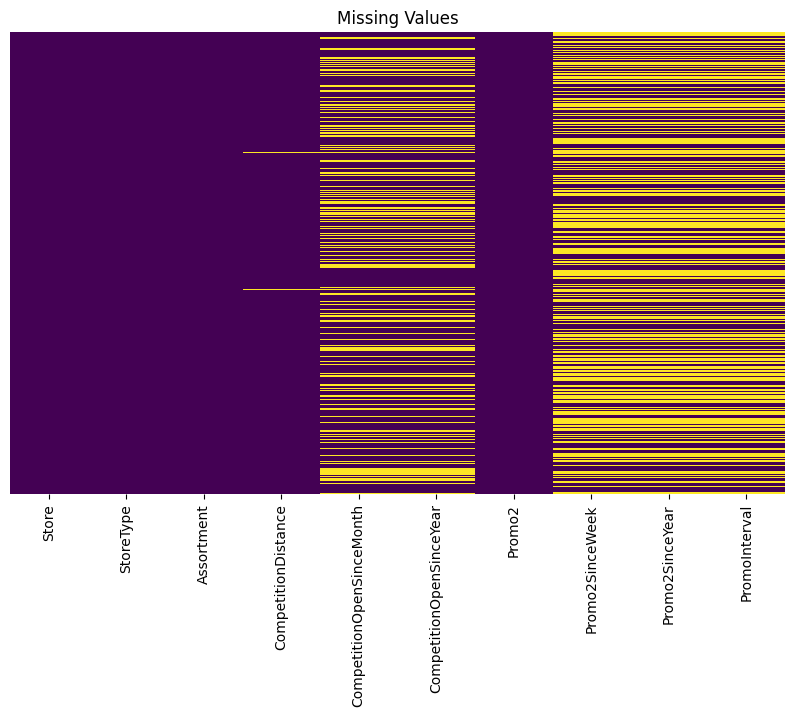

In [18]:
# Visualizing the missing values
#sns.heatmap(stores.isnull(), cbar=False)
plt.figure(figsize=(10, 6))
sns.heatmap(stores.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values')
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [19]:
# Dataset Columns
rossmann_sales.columns


Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [20]:
stores.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [21]:
# Dataset Describe
rossmann_sales.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [22]:
# Check Unique Values for each variable.
print(rossmann_sales.apply(lambda col:col.unique()))


Store            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
DayOfWeek                                    [5, 4, 3, 2, 1, 7, 6]
Date             [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
Sales            [5263, 6064, 8314, 13995, 4822, 5651, 15344, 8...
Customers        [555, 625, 821, 1498, 559, 589, 1414, 833, 687...
Open                                                        [1, 0]
Promo                                                       [1, 0]
StateHoliday                                       [0, a, b, c, 0]
SchoolHoliday                                               [1, 0]
dtype: object


In [23]:
# Check Unique Values for each variable.
for i in rossmann_sales.columns.tolist():
  print("No. of unique values in ",i,"is",rossmann_sales[i].nunique(),".")

No. of unique values in  Store is 1115 .
No. of unique values in  DayOfWeek is 7 .
No. of unique values in  Date is 942 .
No. of unique values in  Sales is 21734 .
No. of unique values in  Customers is 4086 .
No. of unique values in  Open is 2 .
No. of unique values in  Promo is 2 .
No. of unique values in  StateHoliday is 5 .
No. of unique values in  SchoolHoliday is 2 .


In [24]:
print(stores.apply(lambda col:col.unique()))


Store                        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
StoreType                                                         [c, a, d, b]
Assortment                                                           [a, c, b]
CompetitionDistance          [1270.0, 570.0, 14130.0, 620.0, 29910.0, 310.0...
CompetitionOpenSinceMonth    [9.0, 11.0, 12.0, 4.0, 10.0, 8.0, nan, 3.0, 6....
CompetitionOpenSinceYear     [2008.0, 2007.0, 2006.0, 2009.0, 2015.0, 2013....
Promo2                                                                  [0, 1]
Promo2SinceWeek              [nan, 13.0, 14.0, 1.0, 45.0, 40.0, 26.0, 22.0,...
Promo2SinceYear              [nan, 2010.0, 2011.0, 2012.0, 2009.0, 2014.0, ...
PromoInterval                [nan, Jan,Apr,Jul,Oct, Feb,May,Aug,Nov, Mar,Ju...
dtype: object


In [25]:
# Check Unique Values for each variable.
for i in stores.columns.tolist():
  print("No. of unique values in ",i,"is",stores[i].nunique(),".")

No. of unique values in  Store is 1115 .
No. of unique values in  StoreType is 4 .
No. of unique values in  Assortment is 3 .
No. of unique values in  CompetitionDistance is 654 .
No. of unique values in  CompetitionOpenSinceMonth is 12 .
No. of unique values in  CompetitionOpenSinceYear is 23 .
No. of unique values in  Promo2 is 2 .
No. of unique values in  Promo2SinceWeek is 24 .
No. of unique values in  Promo2SinceYear is 7 .
No. of unique values in  PromoInterval is 3 .


In [26]:
merged_df = pd.merge(rossmann_sales, stores, on='Store', how='left')
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [27]:
merged_df.shape

(1017209, 18)

In [28]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [29]:
merged_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


## 3. ***Data Wrangling***

### Data Wrangling Code

In [30]:
# Write your code to make your dataset analysis ready.
df = merged_df.copy()


###**DATA CLEANING**

In [31]:

df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [32]:
mean_value = df['CompetitionDistance'].mean()
df['CompetitionDistance'].fillna(mean_value, inplace=True)

mean_value = df['CompetitionOpenSinceMonth'].mean()
df['CompetitionOpenSinceMonth'].fillna(mean_value, inplace=True)

mean_value = df['CompetitionOpenSinceYear'].mean()
df['CompetitionOpenSinceYear'].fillna(mean_value, inplace=True)

mean_value = df['Promo2SinceWeek'].mean()
df['Promo2SinceWeek'].fillna(mean_value, inplace=True)

mean_value = df['Promo2SinceYear'].mean()
df['Promo2SinceYear'].fillna(mean_value, inplace=True)

df['PromoInterval'].fillna('0', inplace=True)


In [33]:
#change into int type
for i in df.columns:
  if df[i].dtypes == 'float64':
    df[i] = df[i].apply(int)

df.dtypes

Store                         int64
DayOfWeek                     int64
Date                         object
Sales                         int64
Customers                     int64
Open                          int64
Promo                         int64
StateHoliday                 object
SchoolHoliday                 int64
StoreType                    object
Assortment                   object
CompetitionDistance           int64
CompetitionOpenSinceMonth     int64
CompetitionOpenSinceYear      int64
Promo2                        int64
Promo2SinceWeek               int64
Promo2SinceYear               int64
PromoInterval                object
dtype: object

In [34]:
# Object to Datetime
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.weekofyear
years = df['Year'].unique()
years

array([2015, 2014, 2013])

In [35]:

# Object to int
df.loc[df['StateHoliday']=='0', 'StateHoliday']=0
df.loc[df['StateHoliday']=='a', 'StateHoliday']= 1
df.loc[df['StateHoliday']=='b', 'StateHoliday']=2
df.loc[df['StateHoliday']=='c', 'StateHoliday']= 3
#
df['StateHoliday']=df['StateHoliday'].astype(int,copy=False)

In [36]:
# Object to int
df.loc[df['StoreType']=='a', 'StoreType']= 0
df.loc[df['StoreType']=='b', 'StoreType']= 1
df.loc[df['StoreType']=='c', 'StoreType']= 2
df.loc[df['StoreType']=='d', 'StoreType']= 3

df['StoreType']=df['StoreType'].astype(int,copy=False)

In [37]:
# Object to int
df.loc[df['Assortment']=='a', 'Assortment']=0
df.loc[df['Assortment']=='b', 'Assortment']= 1
df.loc[df['Assortment']=='c', 'Assortment']=2

df['Assortment']=df['Assortment'].astype(int,copy=False)

In [38]:
# Object to int
df.loc[df['PromoInterval']=='Jan,Apr,Jul,Oct', 'PromoInterval']= 1
df.loc[df['PromoInterval']=='Feb,May,Aug,Nov', 'PromoInterval']= 2
df.loc[df['PromoInterval']=='Mar,Jun,Sept,Dec', 'PromoInterval']= 3

df['PromoInterval']=df['PromoInterval'].astype(int,copy=False)
df.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                          int64
SchoolHoliday                         int64
StoreType                             int64
Assortment                            int64
CompetitionDistance                   int64
CompetitionOpenSinceMonth             int64
CompetitionOpenSinceYear              int64
Promo2                                int64
Promo2SinceWeek                       int64
Promo2SinceYear                       int64
PromoInterval                         int64
Year                                  int64
Month                                 int64
WeekOfYear                            int64
dtype: object

In [39]:
print(df.apply(lambda col:col.unique()))

Store                        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
DayOfWeek                                                [5, 4, 3, 2, 1, 7, 6]
Date                         [2015-07-31T00:00:00.000000000, 2015-07-30T00:...
Sales                        [5263, 6064, 8314, 13995, 4822, 5651, 15344, 8...
Customers                    [555, 625, 821, 1498, 559, 589, 1414, 833, 687...
Open                                                                    [1, 0]
Promo                                                                   [1, 0]
StateHoliday                                                      [0, 1, 2, 3]
SchoolHoliday                                                           [1, 0]
StoreType                                                         [2, 0, 3, 1]
Assortment                                                           [0, 2, 1]
CompetitionDistance          [1270, 570, 14130, 620, 29910, 310, 24000, 752...
CompetitionOpenSinceMonth              [9, 11, 12, 4

In [40]:
df.duplicated().value_counts()
# no duplicated values

False    1017209
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

In [42]:
a=df.groupby('PromoInterval')

In [43]:
a.size().sort_values()

PromoInterval
3     97460
2    118596
1    293122
0    508031
dtype: int64

In [44]:
b=df.groupby('StoreType')
b.size().sort_values()

StoreType
1     15830
2    136840
3    312912
0    551627
dtype: int64

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [45]:
# Chart - 1 visualization code

categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                         'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']
for i in categorical_variables:
  store_type = df.groupby(i)["Sales","Customers"].sum().reset_index()

  store_type.sort_values(["Sales","Customers"], ascending= False, inplace = True) # sorting into descending order to get higher values
  print(f'\n{i} and Group Wise Sum Of Sales And Customers \n\n{store_type} ')


DayOfWeek and Group Wise Sum Of Sales And Customers 

   DayOfWeek       Sales  Customers
0          1  1130203012  117675012
1          2  1020411930  110848063
4          5   980555941  108384820
2          3   954962863  105117642
3          4   911177709  101732938
5          6   846317735   95103854
6          7    29551433    5179426 

Open and Group Wise Sum Of Sales And Customers 

   Open       Sales  Customers
1     1  5873180623  644041755
0     0           0          0 

Promo and Group Wise Sum Of Sales And Customers 

   Promo       Sales  Customers
1      1  3101206286  318263948
0      0  2771974337  325777807 

StateHoliday and Group Wise Sum Of Sales And Customers 

   StateHoliday       Sales  Customers
0             0  5865164768  642797995
1             1     5890305     887746
2             2     1433744     244599
3             3      691806     111415 

SchoolHoliday and Group Wise Sum Of Sales And Customers 

   SchoolHoliday       Sales  Customers
0          

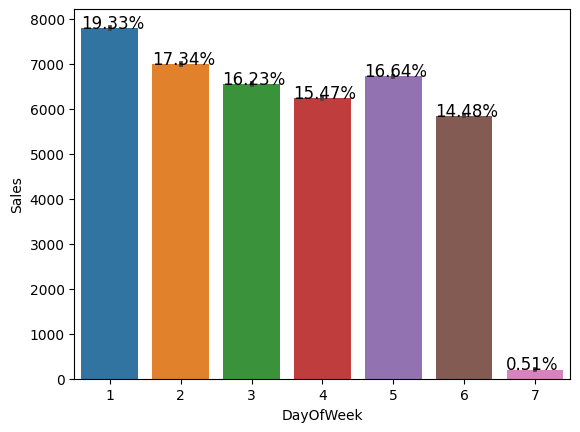

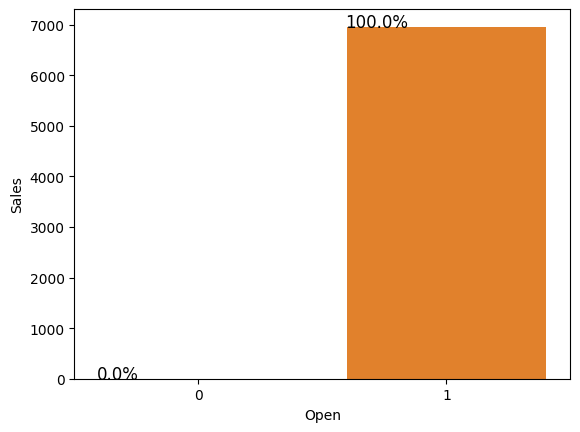

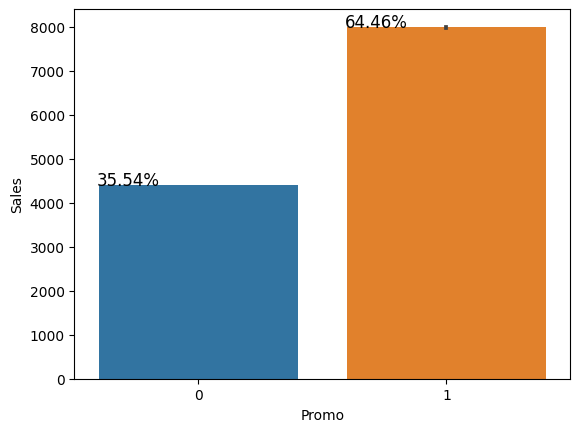

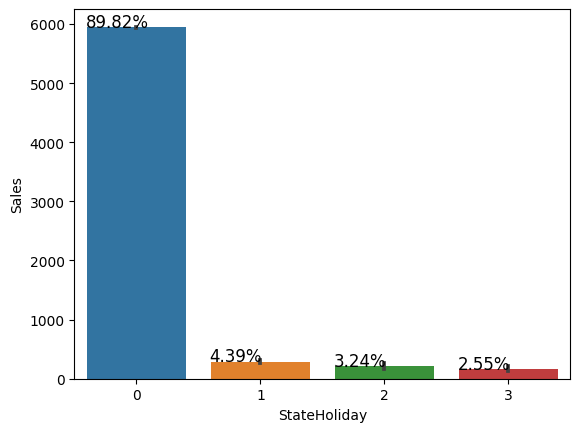

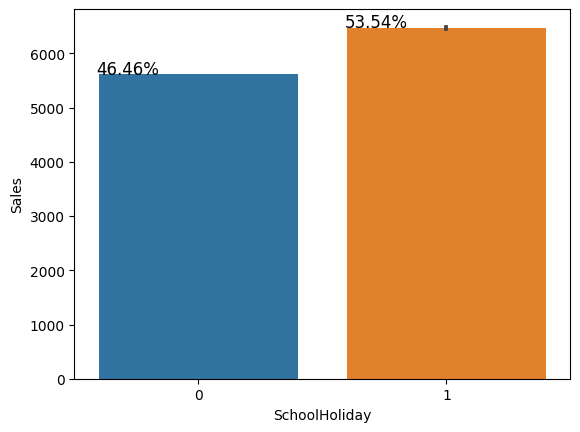

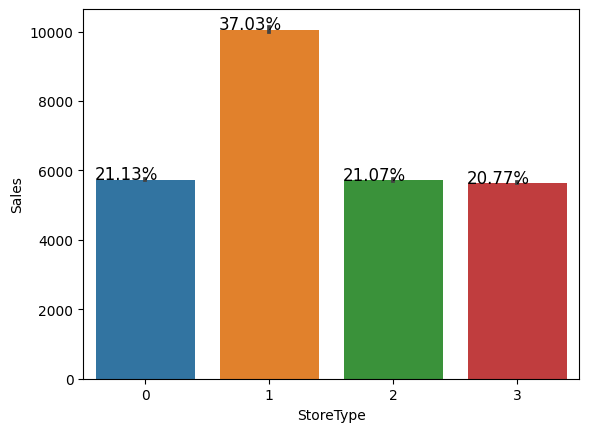

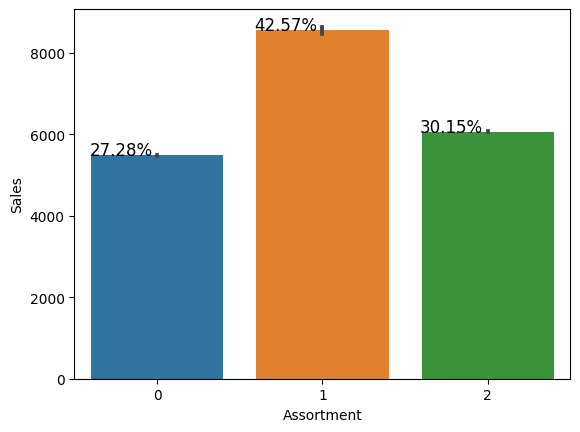

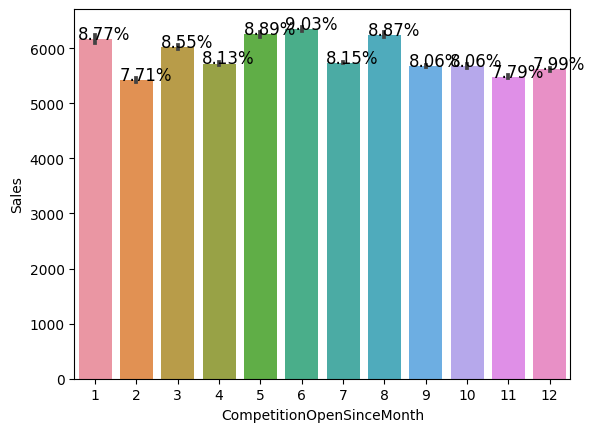

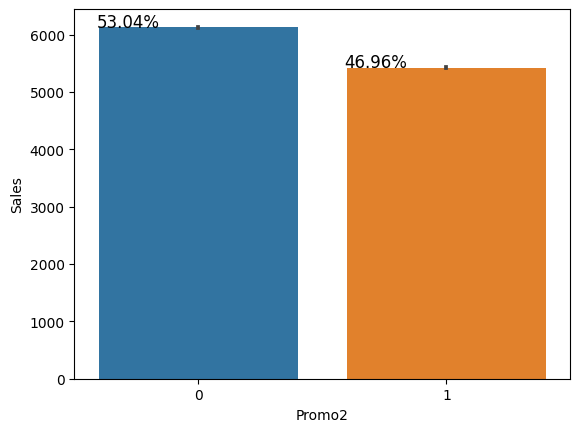

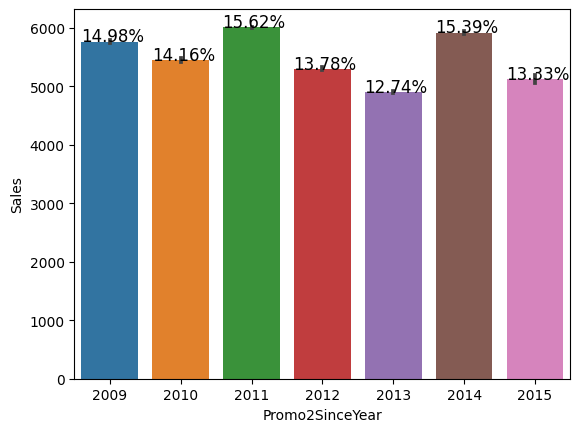

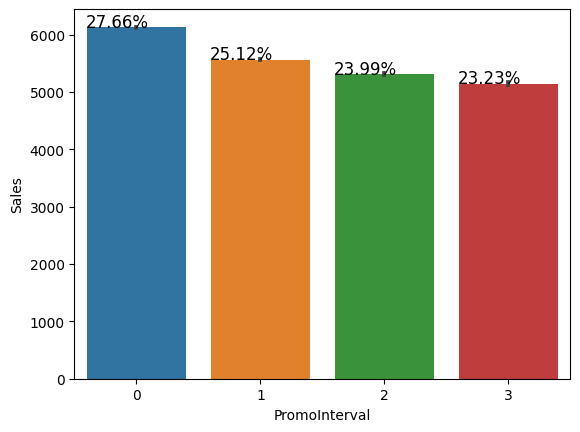

In [46]:
for value in categorical_variables:
  ax = sns.barplot(x=df[value], y=df['Sales'])
  totals = []
  for i in ax.patches: #for every patch in the barplot ax
      totals.append(i.get_height()) #append height for each patch

  total = sum(totals) #sum of each patch height for a plot

  for i in ax.patches:
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)  #text position and formula for percentage
  plt.show()

**The results for each categorical variable, you can gain insights into the relationship between these variables and sales/customer performance. These insights can inform decision-making processes, such as targeting specific customer segments, optimizing promotions, or adjusting operations based on seasonal or competitive factors.**

**The code allows for a visual comparison of sales across different categories within each categorical variable. The percentage labels provide additional insights into the relative contribution of each category to the total sales. These insights can guide decision-making processes, such as resource allocation, marketing strategies, and identifying areas for improvement or growth within specific categories.**

#### Chart - 2

Text(0.5, 1.0, 'Sales and Competition Open Since Year')

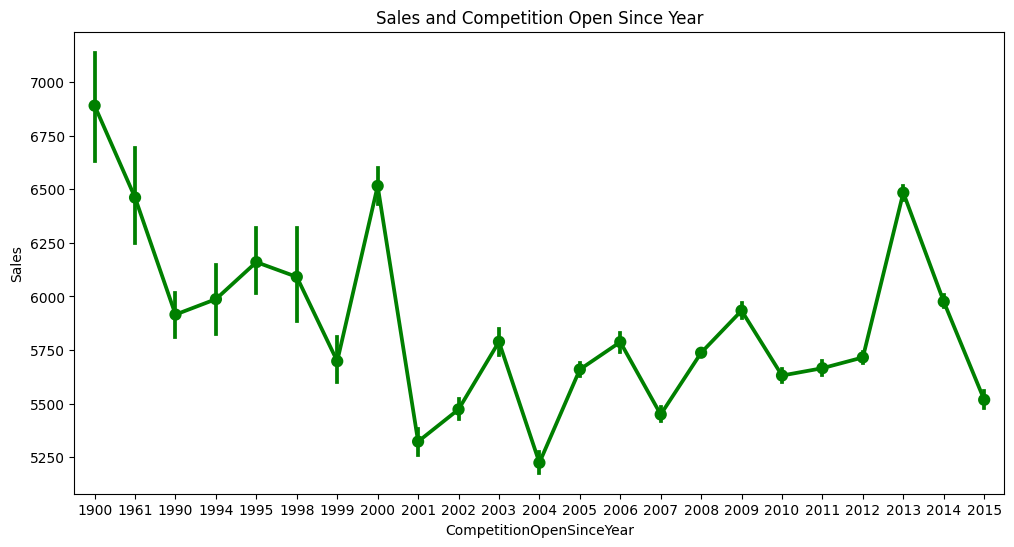

In [47]:
# Chart - 2 visualization code
plt.figure(figsize=(12,6))
sns.pointplot(x= 'CompetitionOpenSinceYear',y='Sales', data=df,color="Green")
sns.set_style("dark")
plt.title("Sales and Competition Open Since Year")

**From this chart we get insights that Sales is Highest During the Year 1900 because for that time there are limited number of Stores ,hence the competition is very low. But as year pass,no of stores get increased that means Competition also increased accordignly ,hence Sales got Decline year by year.**

#### Chart - 3

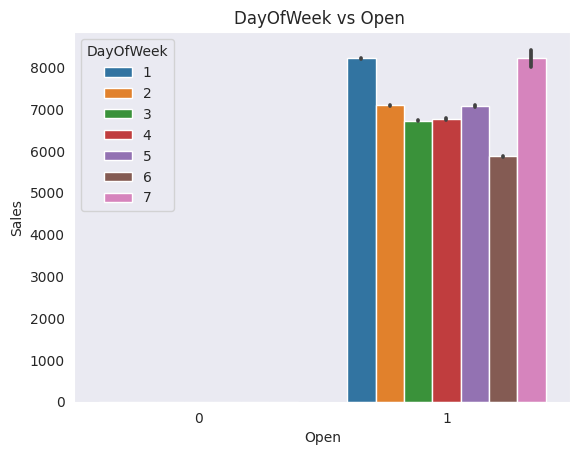

Axes(0.125,0.11;0.775x0.77)


In [48]:
# Chart - 3 visualization code
Open_and_Sales_DayOfWeek = sns.barplot(x=df["Open"],y=df['Sales'],hue=df["DayOfWeek"])
plt.title('DayOfWeek vs Open ')
plt.show()
print(Open_and_Sales_DayOfWeek)

**This visualization helps understand the relationship between store opening status, sales, and different days of the week. It can provide insights into the impact of store closures on sales performance and identify any variations in customer behavior across different days.**

#### Chart - 4

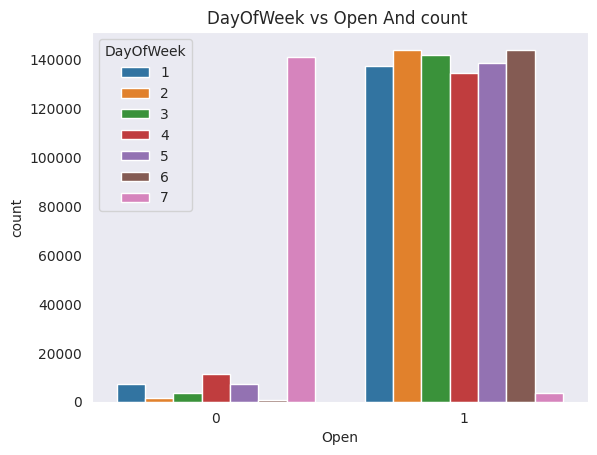

In [49]:
# Chart - 4 visualization code
sns.countplot(x=df["Open"],hue=df["DayOfWeek"])
plt.title('DayOfWeek vs Open And count ')
plt.show()

**The count plot provides a visual representation of the distribution of store openings and closures across different days of the week.
By analyzing the heights of the bars, you can identify the frequency of store openings and closures for each day of the week.
The hue (color) differentiation for each day of the week allows for easy comparison of the distribution patterns.
Overall, this visualization helps understand the distribution and frequency of store openings and closures across different days of the week. It provides insights into the store's operating patterns and can be useful for analyzing store schedules, staffing requirements, or identifying any variations in store operations based on different days of the week.**

#### Chart - 5

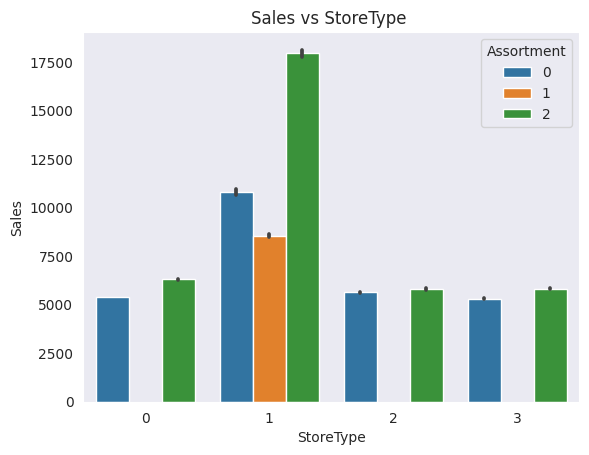

In [50]:
# Chart - 5 visualization code
sns.barplot(x=df["StoreType"],y=df['Sales'],hue=df["Assortment"])
plt.title('Sales vs StoreType ')
plt.show()

**The bar plot allows for a visual comparison of sales performance across different store types.
By analyzing the heights of the bars, you can identify the sales levels associated with each store type and how they vary based on the product assortment.
The hue (color) differentiation based on assortment type helps understand any differences in sales patterns between the assortments within each store type.
Overall, this visualization provides insights into the sales performance of different store types and how it may vary based on the product assortment. It can help identify which store types and assortments contribute more significantly to overall sales, guiding decision-making processes related to inventory management, assortment planning, and store strategy.**

#### Chart - 6

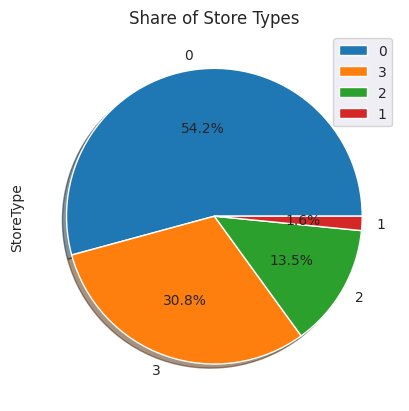

In [51]:
# Chart - 6 visualization code
df["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

**The pie chart provides a clear visual representation of the distribution of store types.
By analyzing the sizes of the slices, you can easily identify the relative proportions or shares of each store type within the dataset.
The autopct parameter displays the percentage values on each slice, allowing for a quick understanding of the distribution.
Overall, this visualization helps understand the composition and distribution of store types in the dataset. It provides insights into the relative prevalence of each store type, allowing for a high-level overview of the dataset's store type distribution.**

#### Chart - 7

In [52]:
# Chart - 7 visualization code
print(years)

[2015 2014 2013]


In [53]:
# Sales and Years

Sales_df_2013 = df[df['Year']== 2013]
Sales_df_2014 = df[df['Year']==2014]
Sales_df_2015 = df[df['Year']== 2015]


In [54]:
# Monthly Sales
Sales_2013 = Sales_df_2013.groupby('Month')['Sales'].sum().reset_index()
Sales_2014 = Sales_df_2014.groupby('Month')['Sales'].sum().reset_index()
Sales_2015 = Sales_df_2015.groupby('Month')['Sales'].sum().reset_index()


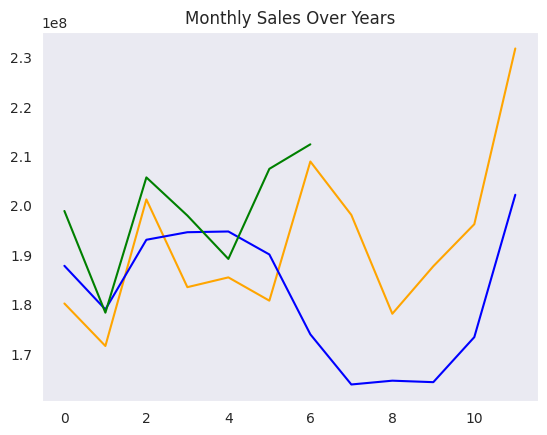

In [55]:
# Visualization
plt.plot(Sales_2013.loc[:,'Sales'],label='2013',color='orange')
plt.plot(Sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(Sales_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.show()

**The line plot allows for a visual comparison of the monthly sales trends across the three years.
By analyzing the trajectory and relative positions of the lines, you can identify any patterns or changes in sales performance over time.
The plot can help identify seasonal trends, year-over-year growth, or any notable variations in monthly sales.
Overall, this visualization provides insights into the monthly sales trends over consecutive years. It helps identify patterns, trends, or any changes in sales performance over time. This information can be valuable for identifying seasonal peaks, evaluating the effectiveness of strategies implemented over the years, or making informed decisions related to inventory management, marketing campaigns, or sales forecasting.**

#### Chart - 8

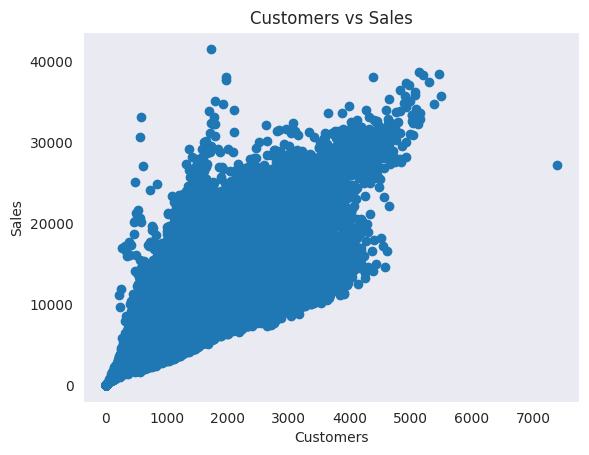

In [56]:
# Chart - 8 visualization code
plt.scatter(df['Customers'], df['Sales'],)
plt.title('Customers vs Sales')
plt.xlabel('Customers')
plt.ylabel('Sales')

plt.show()

**The scatter plot allows for a visual exploration of the relationship between the number of customers and the corresponding sales.
By analyzing the distribution of data points, you can identify any patterns or trends in the relationship between customer count and sales.
The scatter plot can help identify any linear or non-linear associations, clusters, or outliers in the data.
Overall, this visualization provides insights into the relationship between customer count and sales. It helps understand how changes in customer count relate to sales performance and can be useful for identifying customer segments with higher sales potential, evaluating the effectiveness of marketing strategies in attracting customers, or assessing the impact of customer-related factors on sales.**

#### Chart - 9

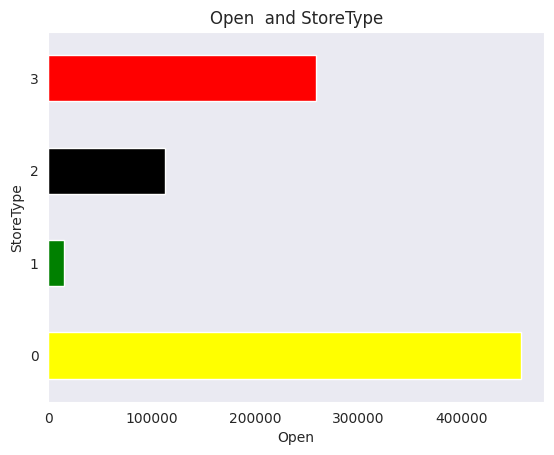

In [57]:
# Chart - 9 visualization code
color = ['yellow','green','black','red']
df.groupby('StoreType')['Open'].sum().plot(kind='barh',color =color,)
plt.xlabel('Open')
plt.ylabel('StoreType')
plt.title('Open  and StoreType')
plt.show()

**The bar plot allows for a visual comparison of the total count of open stores across different store types.
By analyzing the lengths of the bars, you can identify which store type has the highest or lowest count of open stores.
The color differentiation helps distinguish between store types and adds visual appeal to the plot.
Overall, this visualization provides insights into the distribution of open stores across different store types. It can help identify which store types are more prevalent or have higher opening rates. This information can be valuable for understanding the store network's performance, optimizing resources, or evaluating the distribution strategy based on store types.**

#### Chart - 10

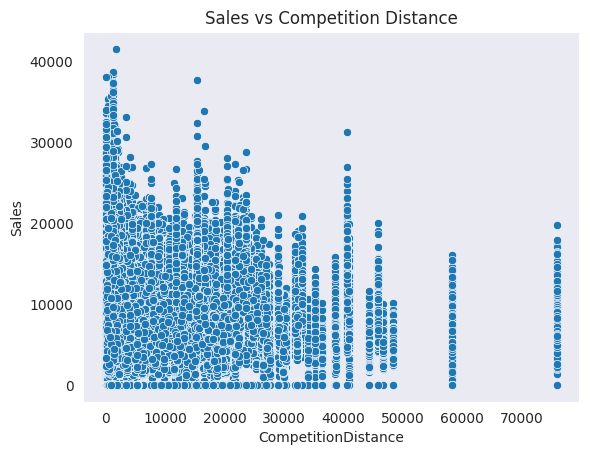

In [58]:
# Chart - 10 visualization code
sns.scatterplot(x=df['CompetitionDistance'], y=df['Sales'])
plt.title('Sales vs Competition Distance')
plt.show()

**The scatter plot allows for a visual exploration of the relationship between the competition distance and sales.
By analyzing the distribution of data points, you can identify any patterns or trends in the relationship between competition distance and sales.
The scatter plot can help identify any correlations, clusters, or outliers in the data.
Overall, this visualization provides insights into the relationship between competition distance and sales. It helps understand how competition proximity may impact sales performance. This information can be valuable for evaluating the competitive landscape, identifying potential opportunities or challenges related to competition, or making informed decisions regarding market positioning, pricing strategies, or promotional activities.**

#### Chart - 11

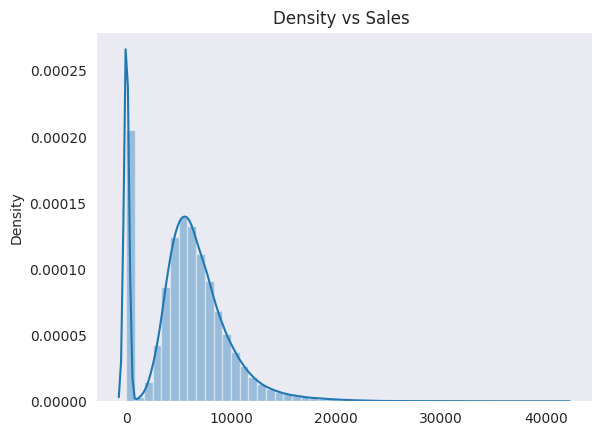

In [59]:
# Chart - 11 visualization code
sns.distplot(x=df['Sales'])
plt.title('Density vs Sales ')
plt.show()

**The density plot provides insights into the distribution and shape of the sales data.
By analyzing the plot, you can identify whether the sales data follows a specific distribution pattern (e.g., normal distribution, skewed distribution).
The plot can help identify the central tendency and spread of the sales values.
Overall, this visualization helps understand the distribution of sales values and provides insights into the typical range and frequency of different sales values. This information can be valuable for setting sales targets, evaluating sales performance against benchmarks, or identifying any anomalies or outliers in the sales data.**

#### Chart - 12

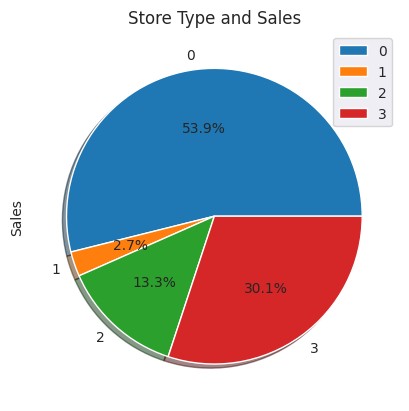

In [60]:
# Chart - 12 visualization code
df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

**The pie chart provides a clear visual representation of the distribution of sales across different store types.
By analyzing the sizes of the slices, you can easily identify the relative proportions or shares of sales for each store type within the dataset.
The autopct parameter displays the percentage values on each slice, allowing for a quick understanding of the distribution.
Overall, this visualization helps understand the contribution of each store type to the total sales. It provides insights into the relative importance of different store types in generating sales and can be useful for analyzing market share, evaluating store type performance, or making informed decisions related to resource allocation and strategic planning.**

#### Chart - 13

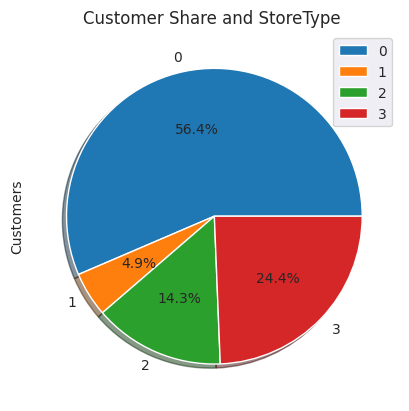

In [61]:
# Chart - 13 visualization code
df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share and StoreType ', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

**The pie chart provides a clear visual representation of the distribution of customers across different store types.
By analyzing the sizes of the slices, you can easily identify the relative proportions or shares of customers for each store type within the dataset.
The autopct parameter displays the percentage values on each slice, allowing for a quick understanding of the distribution.
Overall, this visualization helps understand the customer distribution across different store types. It provides insights into the relative customer share for each store type, allowing for analysis of customer preferences, market segments, or performance evaluation for different store types. This information can be valuable for strategic decision-making, such as marketing campaigns, customer targeting, or resource allocation based on store types.**

#### Chart - 14 - Correlation Heatmap

In [64]:
# Correlation Heatmap visualization code

columns_to_drop = ['Store', 'Year', 'WeekOfYear']
correlation_matrix= df.drop(columns = columns_to_drop, axis =1)
correlation_matrix['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)


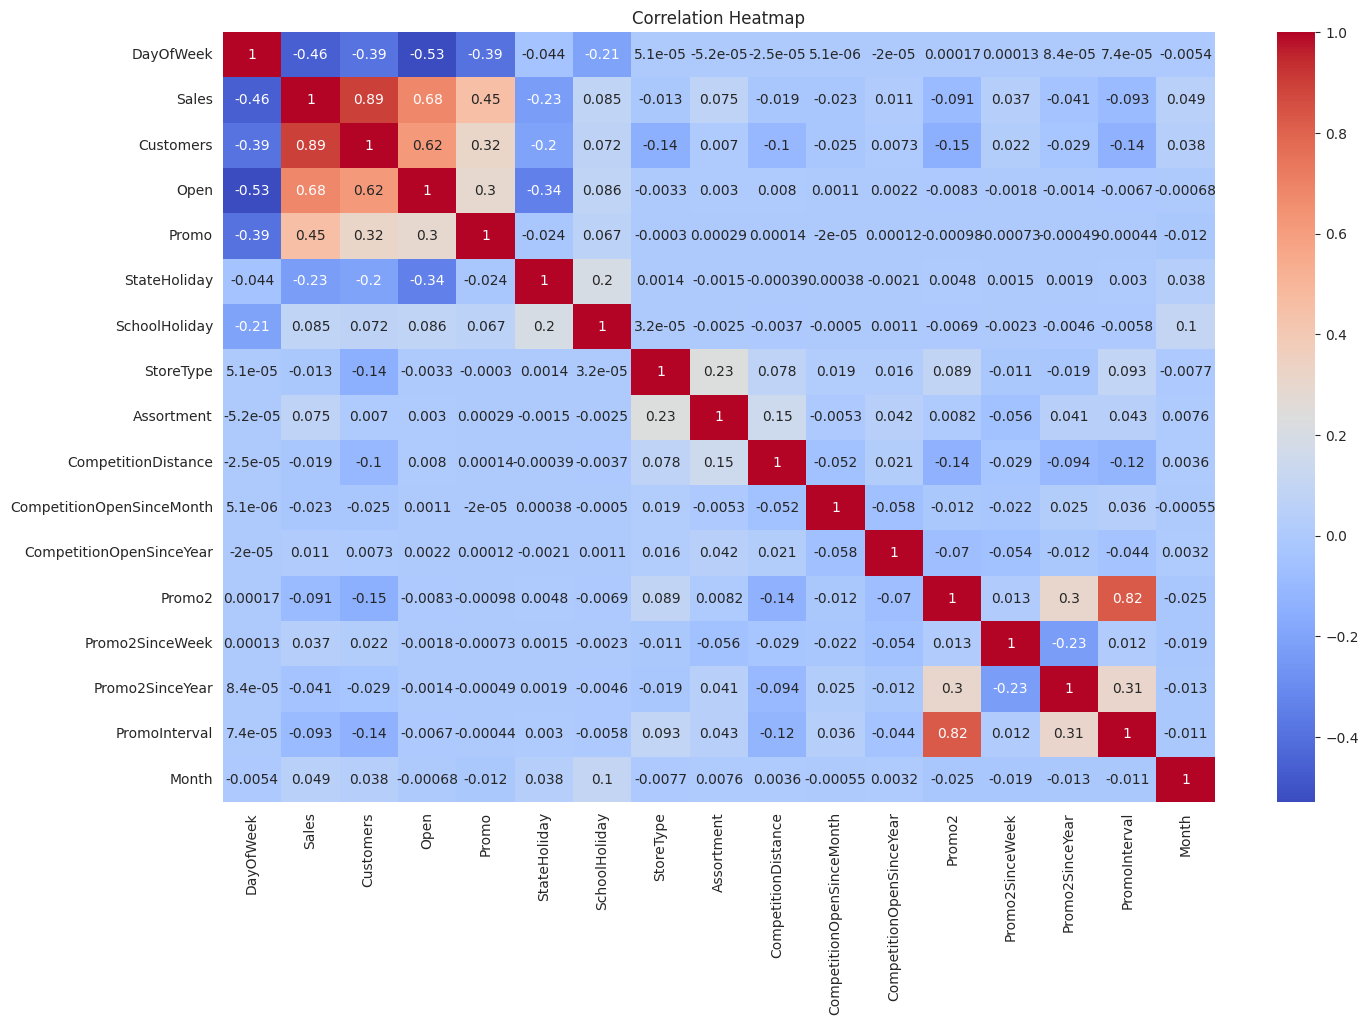

In [65]:
# Set the figure size
plt.figure(figsize=(16,10))
# Calculate the correlation matrix
sns.heatmap(correlation_matrix.corr(), annot=True, cmap='coolwarm')  # Create the heatmap

plt.title('Correlation Heatmap')  # Add a title to the plot
plt.show()

**The resulting correlation matrix, correlation_matrix, can be used to explore the relationships between numerical variables in the dataset.
By examining the correlation coefficients in the matrix, you can gain insights into how variables are related to each other. Positive values indicate a positive correlation, negative values indicate a negative correlation, and values close to 0 indicate little to no correlation.
The dropped columns ('Store', 'Year', 'WeekOfYear') and the transformed 'StateHoliday' column may have been removed or modified to focus on numerical variables or simplify the analysis.
This preparation step is typically followed by visualizing the correlation matrix using a heatmap, which provides a visually intuitive representation of the correlation values.
Overall, the code prepares the correlation matrix by dropping specific columns and transforming categorical data, setting the stage for further analysis and visualization of the relationships between numerical variables in the dataset.**

#### Chart - 15 - Pair Plot

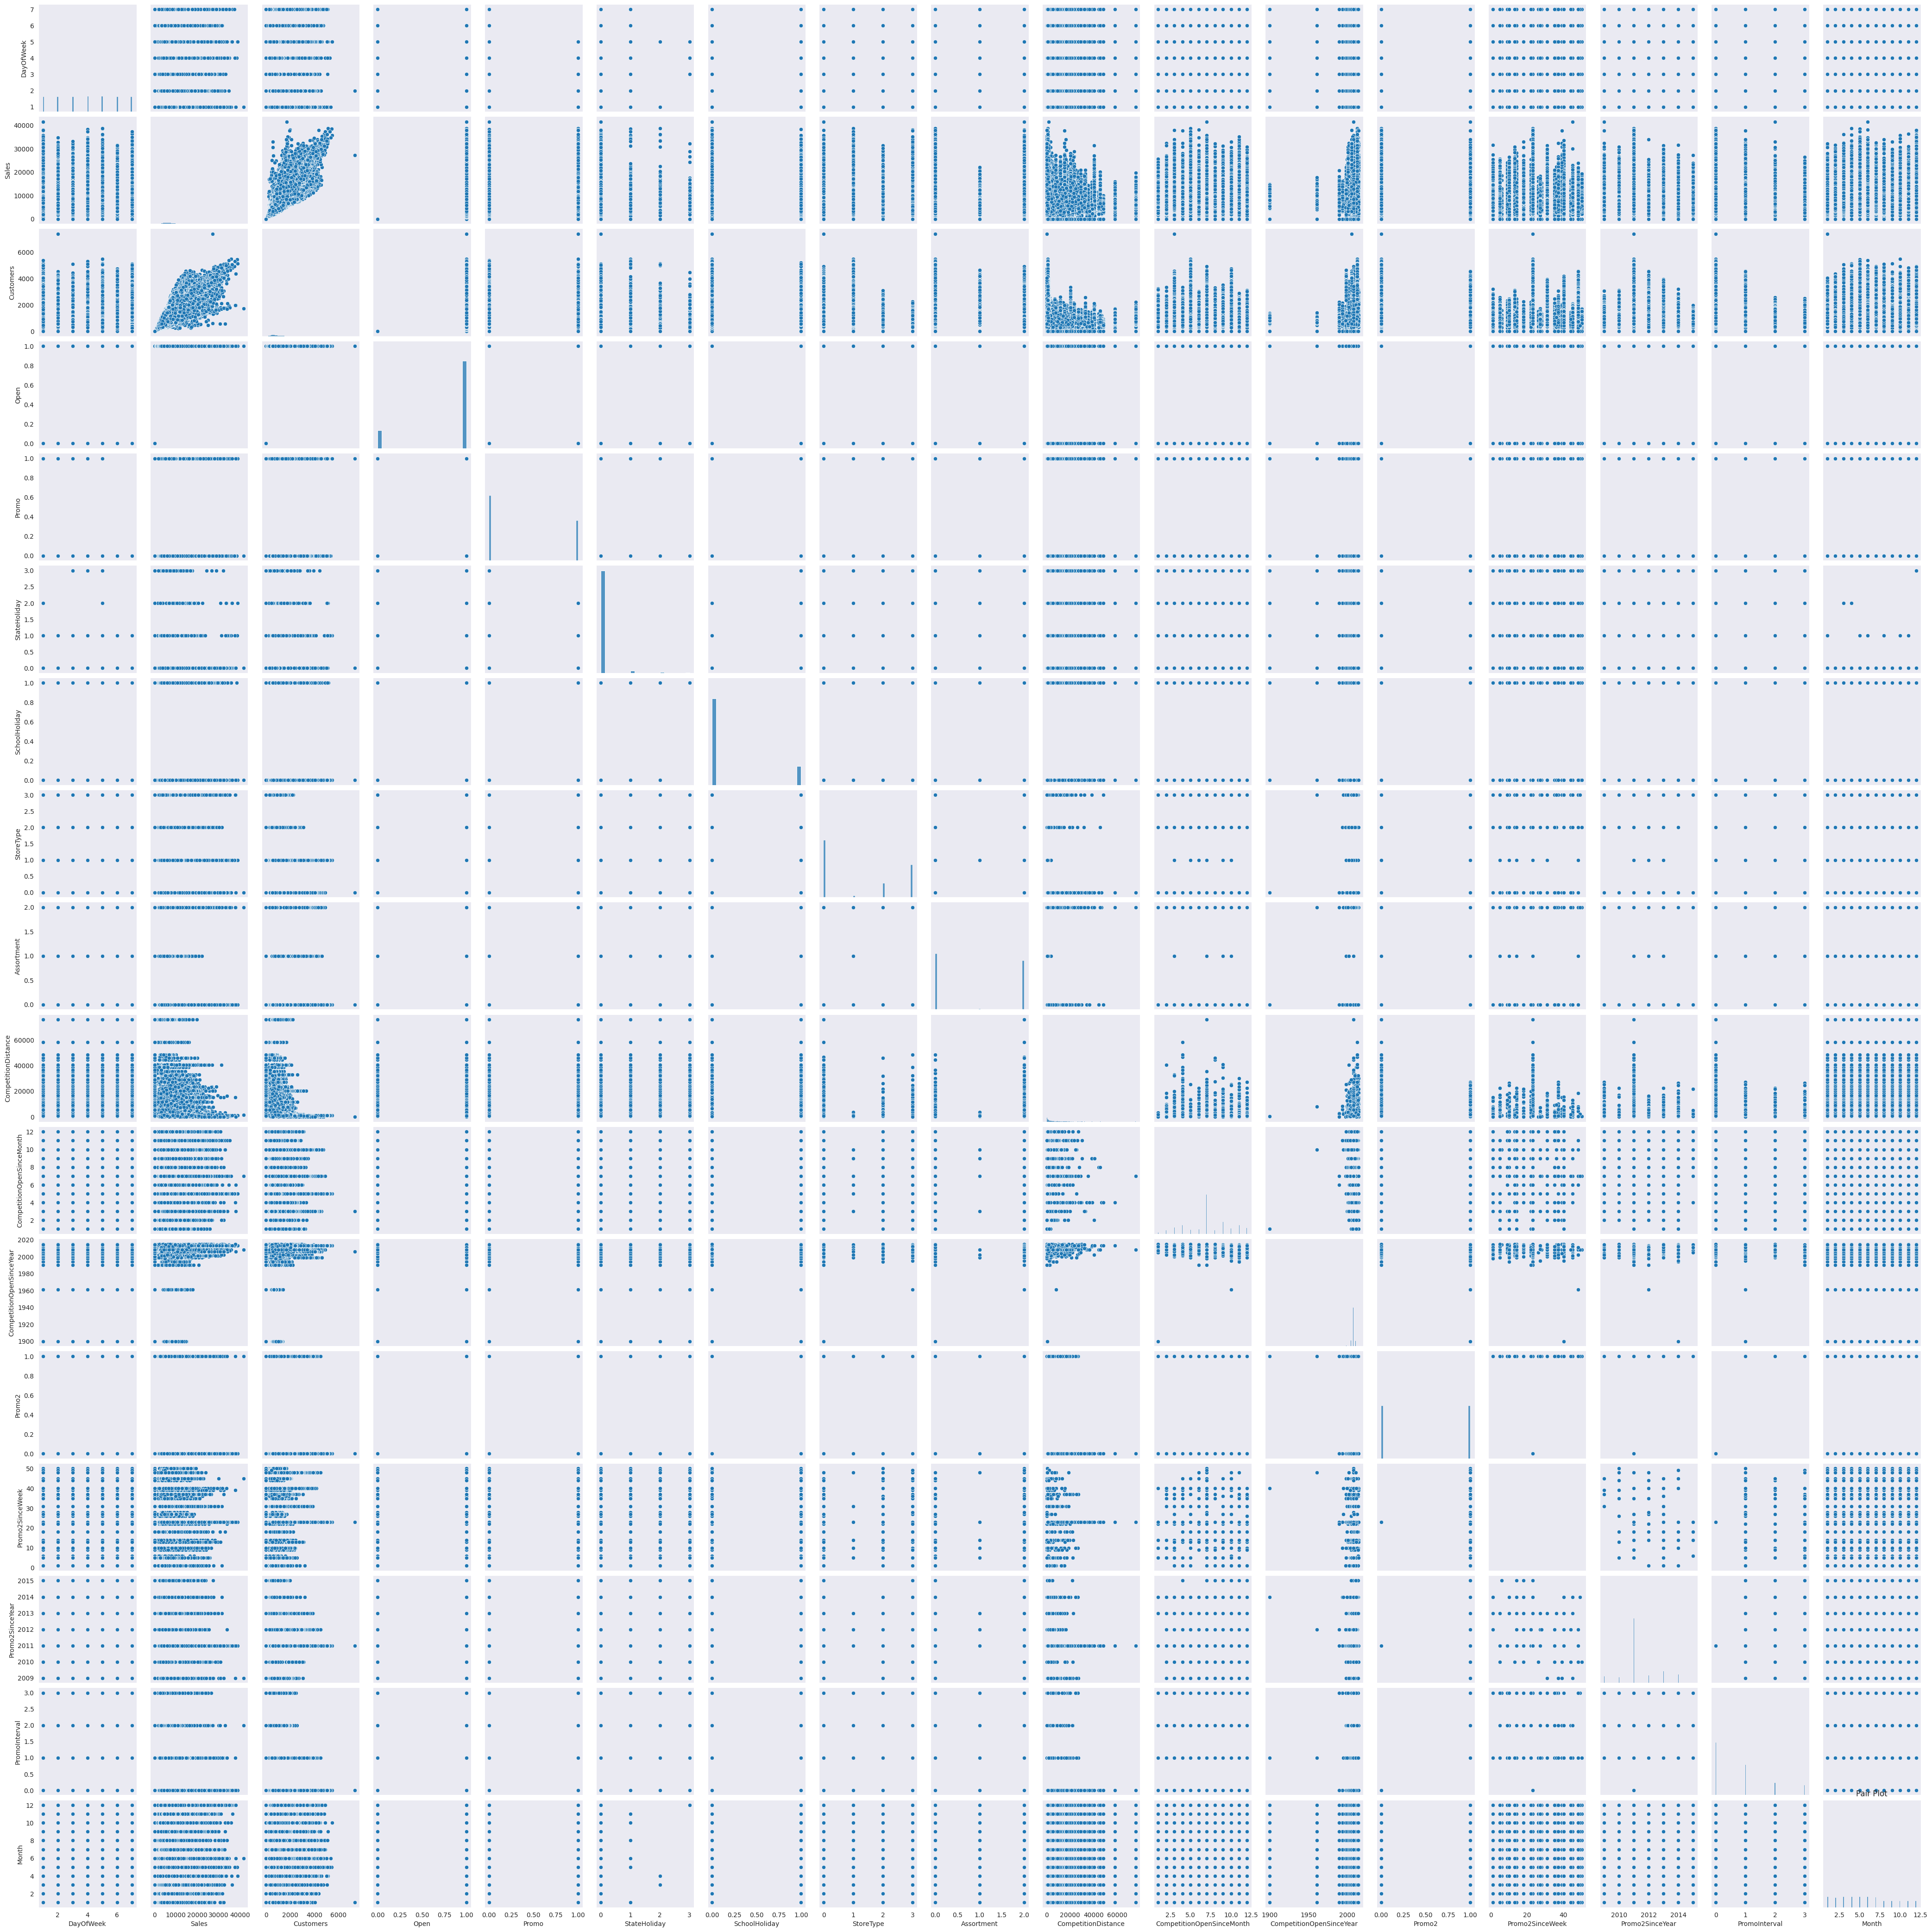

In [66]:
# Pair Plot visualization code
columns_o_drop = ['Store', 'Year', 'WeekOfYear']
correation_matrix= df.drop(columns = columns_o_drop, axis =1)
sns.pairplot(correation_matrix)
plt.title('Pair Plot')

plt.show()

**The pair plot allows for a visual exploration of the relationships between numerical variables in the dataset.
By analyzing the scatter plots, you can identify any patterns, trends, or correlations between variables.
Diagonal plots show the distributions of individual variables, while off-diagonal plots show the scatter plots between variable pairs.
The pair plot is useful for initial data exploration, identifying potential relationships, and detecting outliers or nonlinear patterns.
Overall, this visualization helps gain insights into the relationships between numerical variables in the dataset. It provides a comprehensive view of pairwise relationships, enabling the identification of potential associations and guiding further analysis or modeling decisions.**

# **Conclusion**

**The results for each categorical variable, you can gain insights into the relationship between these variables and sales/customer performance. These insights can inform decision-making processes, such as targeting specific customer segments, optimizing promotions, or adjusting operations based on seasonal or competitive factors.**

**The code allows for a visual comparison of sales across different categories within each categorical variable. The percentage labels provide additional insights into the relative contribution of each category to the total sales. These insights can guide decision-making processes, such as resource allocation, marketing strategies, and identifying areas for improvement or growth within specific categories and more Conclusion.**

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***